Task 2. Algorithms for unconstrained nonlinear optimization. Direct methods


In [5]:
import numpy as np
import matplotlib as plt
import random
import matplotlib.pyplot as plt
from scipy.optimize import minimize, brute

In [21]:
#Task 1 
def cube(input):
    return input**3

def module(input):
    return abs(input-0.2)

def sinus(input):
    return input*np.sin(1/input)

In [28]:
#1.1. Brute Force method
def brute_force(function):
    list1 = []
    N = 0
    if str(function.__name__) == 'sinus':
        for i in range (0, 1001):
            N += 1
            list1.append(function(0.99/1000 *i + 0.01))
    else:
        for i in range (0, 1001):
            N += 1
            list1.append(function(i/1000))
    return min(list1), len(list1), N

x = brute_force(cube)
y = brute_force(module)
z = brute_force(sinus)

print('(minimal, calculations, Number of Iterations) for given 3 functions:', x,y,z)

(minimal, calculations, Number of Iterations) for given 3 functions: (0.0, 1001, 1001) (0.0, 1001, 1001) (-0.21722960129123117, 1001, 1001)


In [37]:
#1.2. Dichotomy method

def dichotomy(function, a,b):
    beta = 0.0009
    s = 0
    N = 0
    while abs(a-b) >= 0.001:
        N+= 1
        s+= 2
        x1 = (a+b-beta)/2
        x2 = (a+b+beta)/2
        if function(x1) <=function(x2):
            b = x2
        else:
            a = x1
        return function((a+b)/2), s+1, N

x = dichotomy(cube,0,1)
y = dichotomy(module,0,1)
z = dichotomy(sinus,0.01,1)

print('(minimal, calculations, Number of Iterations) for given 3 functions:', x,y,z)

(minimal, calculations, Number of Iterations) for given 3 functions: (0.01566722548014062, 3, 1) (0.050224999999999964, 3, 1) (-0.17349748170750484, 3, 1)


In [41]:
#1.3.  Golden section method
def golden(function, a, b):
    s = 0
    N = 0
    x1 = a + (3 - np.sqrt(5)) / 2 * (b - a)
    x2 = b + (np.sqrt(5) - 3) / 2 * (b - a)
    while abs(a-b) >= 0.001:
        N += 1
        s += 1
        if function(x1) <= function(x2):
            b = x2
            x2 = x1
            x1 = a + (3 - np.sqrt(5)) / 2 * (b - a)
        else:
            a = x1
            x1 = x2
            x2 = b + (np.sqrt(5) - 3) / 2 * (b - a)
    return function((a + b) / 2), s + 3, N

x = golden(cube, 0, 1)
y = golden(module, 0, 1)
z = golden(sinus, 0.01, 1)
print('(min, f-calculations, N of iterations) for 3 given functions:',x,y,z)

(min, f-calculations, N of iterations) for 3 given functions: (4.9256800857728296e-11, 18, 15) (7.331374358568454e-05, 18, 15) (-0.21723232817753246, 18, 15)


In [54]:
#Task 2 
alpha = random.uniform (0, 1)
beta = random.uniform (0, 1)

xk = np.array([i/100 for i in range(0, 101)])
yk = [alpha * i + beta + random.normalvariate(0.5, 0.125) for i in xk]

[a,b] = [0.29104109225930325, 0.7815431636359411]


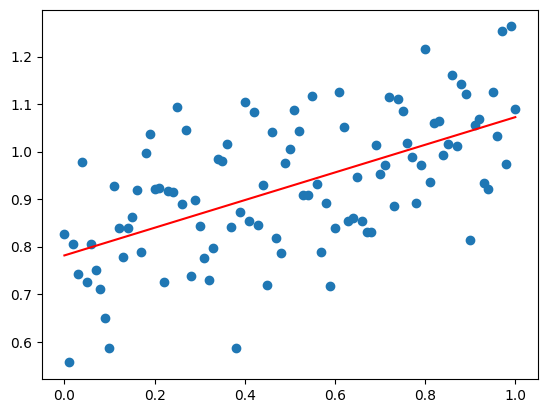

In [55]:
A = np.vstack([xk, np.ones(len(xk))]).T
a, b = np.linalg.lstsq(A, yk, rcond=None)[0]

plt.scatter(xk, yk)
plt.plot(xk, a*xk+b, 'r')
print('[a,b] =',[a, b])
plt.show()

[a, b, f-calculations, N of iterations] = [0.292, 0.781, 1002001, 1002001]


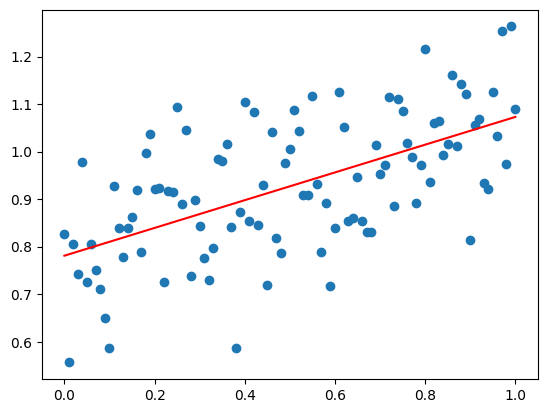

In [56]:
# 2 Exhaustive search

list1= []
for a in range (0,1001):
    a = a/1000
    for b in range(0,1001):
        b = b/1000
        s=0
        for k in range(0,101):
            s+=(a*xk[k]+b -yk[k])**2
        list1.append([s,a,b])

minimum = min(x[0] for x in list1)
for sublist in list1:
    if sublist[0] ==minimum:
        a = sublist[1]
        b = sublist[2]
        break
line= [a,b]
plt.scatter(xk,yk)
plt.plot(xk, a*xk+b, 'r')
print('[a, b, f-calculations, N of iterations] =',[a, b, 1001*1001, 1001*1001],)

[a,b, f-calculations, N of iterations] = [0.292, 0.781, 40040, 40]


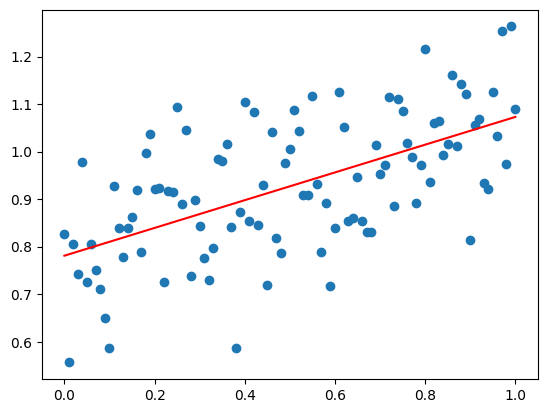

In [61]:
# Gauss
a1 = 0.05
b1 = 0.05
b1_temp = 10000
N = 0
f_calc = 0
while 0 == 0:
    N += 2
    list1 = []
    for a in range(0, 1001):
        f_calc += 1
        a = a / 1000
        s = 0
        for k in range(0, 101):
            s += (a * xk[k] + b1 - yk[k]) ** 2
        list1.append(s)
    a1_temp = list1.index(min(list1)) / 1000
    if abs(a1 - a1_temp) < 0.001 and abs(b1 - b1_temp) < 0.001:
        break
    a1 = a1_temp

    list2 = []
    for b in range(0, 1001):
        f_calc += 1
        b = b / 1000
        s = 0
        for k in range(0, 101):
            s += (a1 * xk[k] + b - yk[k]) ** 2
        list2.append(s)
    b1_temp = list2.index(min(list2)) / 1000
    if abs(b1 - b1_temp) < 0.001 and abs(a1 - a1_temp) < 0.001:
        break
    b1 = b1_temp

gs_lin = [a1,b1]
plt.scatter(xk,yk)
plt.plot(xk, a1*xk+b1, 'r')

print('[a,b, f-calculations, N of iterations] =',[a1, b1, f_calc, N])

Optimization terminated successfully.
         Current function value: 1.373685
         Iterations: 30
         Function evaluations: 60
[a, b] = [0.29056798 0.78169717]


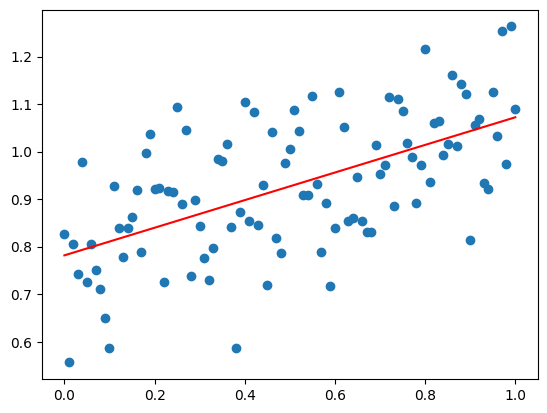

In [63]:
# Nelder- Mead
from scipy.optimize import minimize

def fun(ab):
    a, b = ab
    s = 0
    for k in range(0, 101):
        s += (a * xk[k] + b - yk[k]) ** 2
    return s

result = minimize(fun,[0.3, 0.3], method='nelder-mead', options={'xatol': 0.001,'disp': True})

nm_lin = result.x
print ('[a, b] =',result.x)
plt.scatter(xk,yk)
plt.plot(xk, result.x[0] * xk + result.x[1], 'r')